In [3]:
import hydrogibs as hg
import numpy as np
from matplotlib import pyplot as plt
plt.style.use("ggplot")

## GR4

In [4]:
import pandas as pd

df = pd.read_csv("hydrogibs/test/rain.csv", parse_dates=["Date"])
rain = hg.GR4.Rain(df.Date, df.Rainfall)
catchment = hg.GR4.PresetCatchment("Rimbaud", surface=1.8)

event = rain @ catchment
Qax, Pax, Vax = event.diagram(show=False).axes
Pax.set_title("Rimbaud")
plt.show()

# hg.GR4.App(catchment, rain)

FileNotFoundError: [Errno 2] No such file or directory: 'hydrogibs/test/rain.csv'

# Statistics

In [ ]:
import pandas as pd

df = pd.read_csv("hydrogibs/extreme/débits_mensuels_reyran.csv")
df.t = pd.to_datetime(df.t, format="%Y-%m-%d %H:%M:%S")

ym = hg.extreme.yearly_maxima.YearlyMaxima(df.Q)
ym.plot(kind='return period', show=True)

NameError: name 'hg' is not defined

# Ressaut

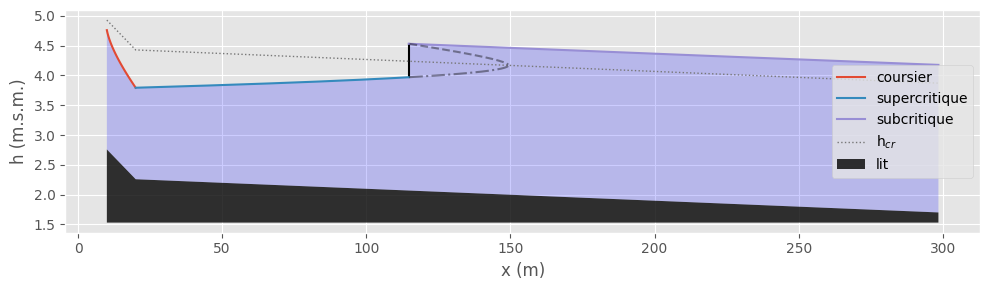

(<Figure size 1000x300 with 1 Axes>,
 <Axes: xlabel='x (m)', ylabel='h (m.s.m.)'>)

In [ ]:
from hydrogibs import Ressaut

Ressaut(
    q=10, i1=0.05, i2=0.002, p=0.5,
    h0=2, ms_K=50, x0=10, xt=20, dx=0.25
).diagram(show=True, figsize=(10, 3))

# 

/home/axel/.local/lib/python3.10/site-packages/scipy/interpolate/_interpolate.py:653: RuntimeWarning: invalid value encountered in divide
  slope = (y_hi - y_lo) / (x_hi - x_lo)[:, None]


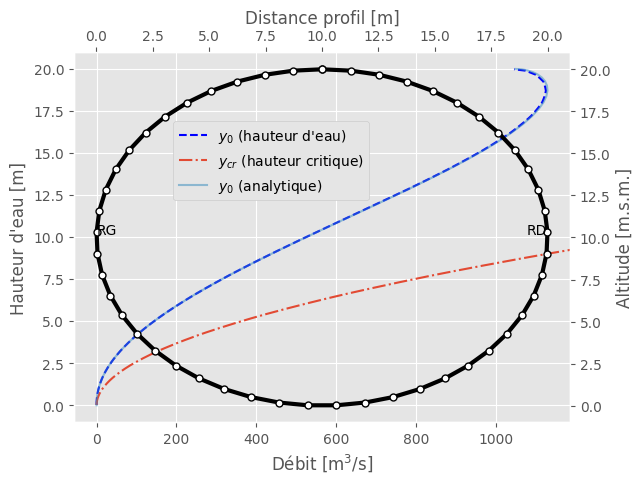

In [7]:
import pandas as pd
from pathlib import Path
from hydrogibs.fluvial.profile import Profile
from matplotlib import pyplot as plt
import numpy as np

DIR = Path().parent / "hydrogibs" / "fluvial"

df = pd.read_csv(DIR / 'closedProfile.csv')
r = 10
K=33
Js=0.12/100
profile = Profile(
    (df.x+1)*r, (df.z+1)*r,
    K=K, Js=Js
)

with plt.style.context('ggplot'):
    fig, (ax1, ax2) = profile.plot()
    ax2.dataLim.x1 = profile.Q.max()
    ax2.autoscale_view()

    # Analytical solution
    theta = np.linspace(1e-10, np.pi)
    S = theta*r**2 - r**2*np.cos(theta)*np.sin(theta)
    P = 2*theta*r
    Q = K*(S/P)**(2/3)*S*Js**0.5
    h = r * (1-np.cos(theta))
    ax2.plot(Q, h, alpha=0.5, label="$y_0$ (analytique)")

    ax1.legend(loc="upper left").remove()
    ax2.legend(loc=(0.2, 0.6)).get_frame().set_alpha(1)
    ax2.set_ylim(ax1.get_ylim()-profile.z.min())
    plt.show()

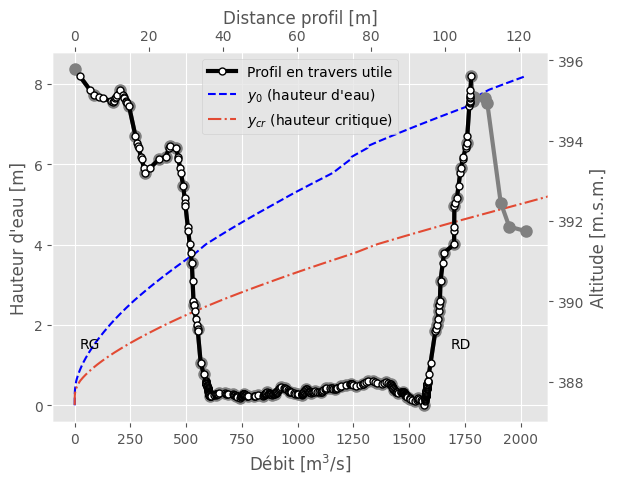

In [10]:
df = pd.read_csv(DIR / 'profile.csv')
profile = Profile(
    df['Dist. cumulée [m]'],
    df['Altitude [m s.m.]'],
    K=33,
    Js=0.12/100
)

with plt.style.context('ggplot'):
    fig, (ax1, ax2) = profile.plot()
    ax1.plot(df['Dist. cumulée [m]'],
                df['Altitude [m s.m.]'],
                '-o', ms=8, c='gray', zorder=0,
                lw=3, label="Profil complet")
    ax2.dataLim.x1 = profile.Q.max()
    ax2.autoscale_view()
    ax2.set_ylim(ax1.get_ylim()-profile.z.min())
    plt.show()